# MSDS 432, Assignment 8 - Greedy Algorithm

#### Author: Brandon Moretz

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from datetime import datetime
import matplotlib.style as style
import calendar

In [3]:
np.random.seed(323) # static seed so results are reproducible

In [4]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Guard Scheduling

In [6]:
guards = ['Tom', 'Jim', 'Barry', 'Erin', 'Jacob', 'Dan']
pay = {p: 15 if p <= 8 else 20 for p in range(1, 13)}
schedule = {d:[[h, [None, 0]] for h in range(0, 24)] for d in calendar.day_name}

In [7]:
guard, onDuty, prevPay = 0, 1, 0
for day in schedule.keys():
    for hour in schedule[day]:
        task = hour[1]
        if task[0] is None:
            curPay = pay[onDuty]
            
            if curPay > prevPay:
                if guard == len(guards)-1:
                    guard = 0
                else:
                    guard += 1
                    
                onDuty = 1
                curPay = pay[onDuty]
                
            task[0] = guards[guard]
            task[1] = curPay
            
            onDuty += 1
            prevPay = curPay
            
            hour = task

## Schedule

In [8]:
schedule

{'Monday': [[0, ['Jim', 15]],
  [1, ['Jim', 15]],
  [2, ['Jim', 15]],
  [3, ['Jim', 15]],
  [4, ['Jim', 15]],
  [5, ['Jim', 15]],
  [6, ['Jim', 15]],
  [7, ['Jim', 15]],
  [8, ['Barry', 15]],
  [9, ['Barry', 15]],
  [10, ['Barry', 15]],
  [11, ['Barry', 15]],
  [12, ['Barry', 15]],
  [13, ['Barry', 15]],
  [14, ['Barry', 15]],
  [15, ['Barry', 15]],
  [16, ['Erin', 15]],
  [17, ['Erin', 15]],
  [18, ['Erin', 15]],
  [19, ['Erin', 15]],
  [20, ['Erin', 15]],
  [21, ['Erin', 15]],
  [22, ['Erin', 15]],
  [23, ['Erin', 15]]],
 'Tuesday': [[0, ['Jacob', 15]],
  [1, ['Jacob', 15]],
  [2, ['Jacob', 15]],
  [3, ['Jacob', 15]],
  [4, ['Jacob', 15]],
  [5, ['Jacob', 15]],
  [6, ['Jacob', 15]],
  [7, ['Jacob', 15]],
  [8, ['Dan', 15]],
  [9, ['Dan', 15]],
  [10, ['Dan', 15]],
  [11, ['Dan', 15]],
  [12, ['Dan', 15]],
  [13, ['Dan', 15]],
  [14, ['Dan', 15]],
  [15, ['Dan', 15]],
  [16, ['Tom', 15]],
  [17, ['Tom', 15]],
  [18, ['Tom', 15]],
  [19, ['Tom', 15]],
  [20, ['Tom', 15]],
  [21, ['Tom'

## Results

In [12]:
results = pd.DataFrame(columns = ['Time', 'Guard', 'Pay'])

curDay, slot = 1, 0
for d in schedule.keys():
    for hour in schedule[d]:
        date = datetime.strptime('{0} {1} {2}:00'.format(day, curDay, hour[0]), '%A %d %H:%M')
        guard = hour[1][0]
        pay = hour[1][1]
        results.loc[slot] = [date, guard, pay]
        slot += 1
    curDay += 1

results.set_index('Time', inplace=True)

## Summary

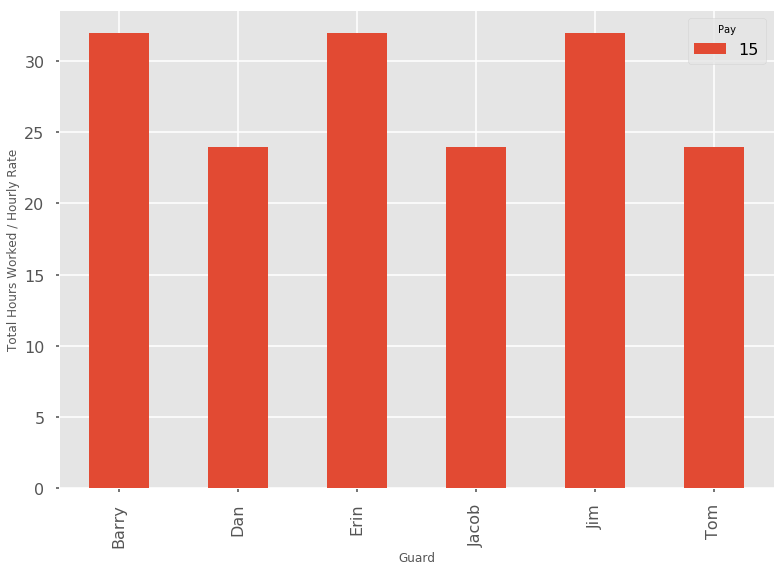

In [19]:
df = results.groupby(['Guard', 'Pay'])['Guard'].count().unstack('Pay').fillna(0)
df.plot.bar()
plt.ylabel('Total Hours Worked / Hourly Rate')

plt.show()

In this lab we explore the concept of a greedy algorithm. The algorithm presented gives an optimal guard scheduling structure for a given week, under the following assumptions:

+	You recently won a new contract in the area to provide 24x7 security to a small under construction building (for simplicity we will design the solution for only 24 hours, but if you want to go above and beyond, feel free to write code that handles the 24x7 scenario as well)
+	People working less than or equal to 8 hours will be paid $15hr

+	Anyone working overtime (>8 hours) will be paid an additional $5,i.e. $20/hr

+	You have 6 security guards available at the moment who you can assign to this building but your goal is to make more money 
out of this contract and spend less in wages (hence greedy!)

Under the conditions stated above, the approach is to generate an empty slate of every hour of every day for scheduling (i.e., define the problem domain). Once the domain is generated, we construct a look-up table for hours works and hourly rate (0-23, with any value less than or equal to 8 having 15 dollar wage, and any value greater than 8 having 20 dollar wage).

To fill out the schedule we use a round-robbing mechanism that schedules one guard consecutively until their hourly rate exceeds the previous rate, then we look for another guard to begin their shift at the regular rate. We continue this process until we have a guard on schedule for every hour of the week.

As we see in the hourly summary above, no one has an hourly rate above the $15 minimum, and the hours are fairly uniformly distributed between all the guards so that everyone is in the weekly rotation.
